# Definition: 
Predators -> P

Prey -> R

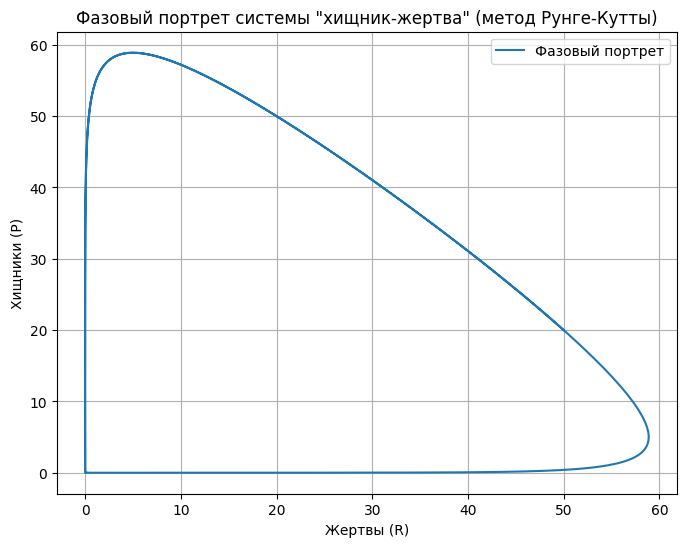

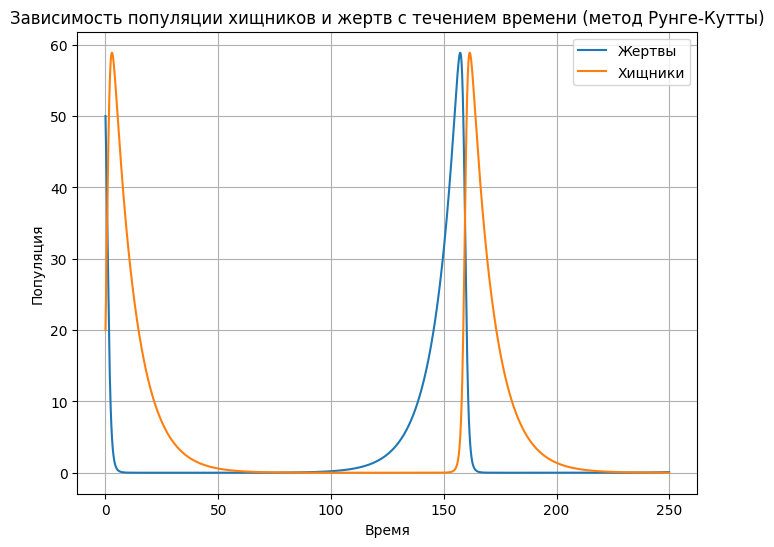

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции, описывающей систему дифференциальных уравнений
def model(y, a, b, c, e):
    R, P = y
    dRdt = a * R - b * P * R
    dPdt = -c * P + e * P * R
    return [dRdt, dPdt]

# Метод Рунге-Кутты 4-го порядка точности
def runge_kutta(h, y_n, t_n, a, b, c, e):
    k1 = h * model(t_n, y_n, a, b, c, e)
    k2 = h * model(t_n + h/2, y_n + k1/2, a, b, c, e)
    k3 = h * model(t_n + h/2, y_n + k2/2, a, b, c, e)
    k4 = h * model(t_n + h, y_n + k3, a, b, c, e)
    return y_n + (k1 + 2*k2 + 2*k3 + k4)/6

# Начальные условия и параметры
y0 = np.array([50, 20])  # начальные значения R и P
t_max = 250
h = 0.1  # шаг интегрирования
t_values = np.arange(0, t_max, h)

# Инициализация массива для хранения результатов
result = np.zeros((len(t_values), 2))

# Численное решение системы с использованием метода Рунге-Кутты
result[0, :] = y0
for i in range(1, len(t_values)):
    result[i, :] = runge_kutta(h, result[i-1, :], t_values[i-1], 0.1, 0.02, 0.1, 0.02)

# Извлечение результатов
R, P = result.T

# Построение фазового портрета
plt.figure(figsize=(8, 6))
plt.plot(R, P, label='Фазовый портрет')
plt.title('Фазовый портрет системы "хищник-жертва" (метод Рунге-Кутты)')
plt.xlabel('Жертвы (R)')
plt.ylabel('Хищники (P)')
plt.legend()
plt.grid(True)
plt.show()

# Построение графика зависимости популяции хищников и жертв с течением времени
plt.figure(figsize=(8, 6))
plt.plot(t_values, R, label='Жертвы')
plt.plot(t_values, P, label='Хищники')
plt.title('Зависимость популяции хищников и жертв с течением времени (метод Рунге-Кутты)')
plt.xlabel('Время')
plt.ylabel('Популяция')
plt.legend()
plt.grid(True)
plt.show()
